# Question 1
How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


## Answer

The learning rate η is a hyperparameter that controls the speed of convergence.   
A smaller learning rate will converge more slowly, but it will be more stable.   
A larger learning rate will converge more quickly, but it may be more likely to diverge.

Common strategies for choosing or adapting the learning rate during training :  
Learning rate decay  
Gradually reduce the learning rate as training progresses. Helps fine tune near the minimum.  

Adaptive learning rate methods  
Automatically adjust learning rates for each parameter.


#  Question 2
`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [9]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Real estate.csv") #Reading dataset
print(df.head())   # Printing first 5 rows to verify data is read correctly

df = df.drop(df.columns[0], axis=1) #Removing unwanted columns which include first column

# Features (X) and Target (y)
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']
y = y.to_numpy()

# Feature scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Splitting data as training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Adding bias (intercept term)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

n_samples, n_features = X_train_b.shape #Getting number of samples and features


#a) Train a Linear Regression model using Batch Gradient Descent (GD)

learning_rate_gd = 0.01     # learning rate
epochs_gd = 1000            # number of epochs

theta_gd = np.zeros(n_features) #Initialising weights as zero

for epoch in range(epochs_gd): #Running training loop
    gradients = (2 / n_samples) * X_train_b.T.dot( #Calculating gradient
        X_train_b.dot(theta_gd) - y_train
    )
    theta_gd -= learning_rate_gd * gradients #updating weights

##

#b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

learning_rate_sgd = 0.01    # learning rate
epochs_sgd = 50             # number of epochs

theta_sgd = np.zeros(n_features) #Defining weights

for epoch in range(epochs_sgd):
    for i in range(n_samples): #Looping through each data point which is done in SGD
        xi = X_train_b[i].reshape(1, -1) #Considering one point
        yi = y_train[i]
        gradient = 2 * xi.T.dot(xi.dot(theta_sgd) - yi) #calculating gradient
        theta_sgd -= learning_rate_sgd * gradient #Updating weight
##

#d) Predict house prices on test dataset
y_pred_gd = X_test_b.dot(theta_gd)  #Getting predicted outputs
y_pred_sgd = X_test_b.dot(theta_sgd)

##

#e) Evaluate models using MSE and R² score
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

##

#f) Print results in clear comparison format
print("\nModel Comparison Results")
print(f"{'Model':<10}{'MSE':<15}{'R2 Score'}")
print(f"{'GD':<10}{mse_gd:<15.4f}{r2_gd:.4f}")
print(f"{'SGD':<10}{mse_sgd:<15.4f}{r2_sgd:.4f}")

##

#g)Change the learning rate and epochs of the SGD model and observe how the performance changes.
learning_rates = [0.01, 0.05, 0.1] #Trying different values
epoch_values = [5000, 1000, 2000]

print("\nSGD Performance with Different Learning Rates and Epochs")
print(f"{'LR':<10}{'Epochs':<10}{'MSE':<12}{'R2 Score'}")

for lr in learning_rates:
    for epochs in epoch_values:
        theta_sgd_temp = np.zeros(n_features)

        for epoch in range(epochs):
            for i in range(n_samples):                 #Getting best results with low learning rate
                xi = X_train_b[i].reshape(1, -1)
                yi = y_train[i]
                gradient = 2 * xi.T.dot(xi.dot(theta_sgd_temp) - yi)
                theta_sgd_temp -= lr * gradient

        y_pred_temp = X_test_b.dot(theta_sgd_temp)
        mse_temp = mean_squared_error(y_test, y_pred_temp)
        r2_temp = r2_score(y_test, y_pred_temp)

        print(f"{lr:<10}{epochs:<10}{mse_temp:<12.4f}{r2_temp:.4f}")


   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

## Answer h)
  

SGD path behave so erratically compared to the GD path because:  
SGD Updates weights after each single data point causing noisy gradients  
GD Updates weights once per epoch using the entire dataset so gradient is accurate

SGD is preferred for very large datasets because:  
SGD uses 1 sample per update. Therefore faster per iteration.  
It requires minimal memory as uses on esample at a time  
In non-convex problems, SGD’s noise can help jump out of flat regions or shallow local minima  





# Question 3
## Decision Trees



### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **z  z** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



 ## Answers  



 a)Decision Tree is a supervised learning algorithm because it is trained using labeled data. Then it predicts outputs for new,unseen data.

Supervised Learning :   
Data has inputs and outputs   
Model learning mapping from input to output

b)Entropy measures impurity or uncertainty in a dataset.
It tells us how mixed the classes are.

Entropy in the context of decision trees is how randomly data is classified at a node.
Example, If there is only one class then entropy is 0.

Decision trees choose splits that:
Reduce entropy
Create more pure child nodes

c)Reduction of entropy means we are creating purer child nodes and moving closer to the correct predicted value. It means that purity of child notes is increased an uncertainty is reduced.    

d)  
1)Entropy of the root node is 1.00  
2)For split x<-2, entropy of the two child nodes is 0.89
  For split x<2, entropy of the two child nodes is 0.89
  For split y<2 , entropy of the two child nodes is 0.72  
3)For split x<-2, reduction in entropy is 0.11  
  For split x<2, reduction in entropy is 0.11  
  For split y<2 , reduction in entropy is 0.28   
4)Based on maximum entropy reduction split y<2 shoul dbe choosen.

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


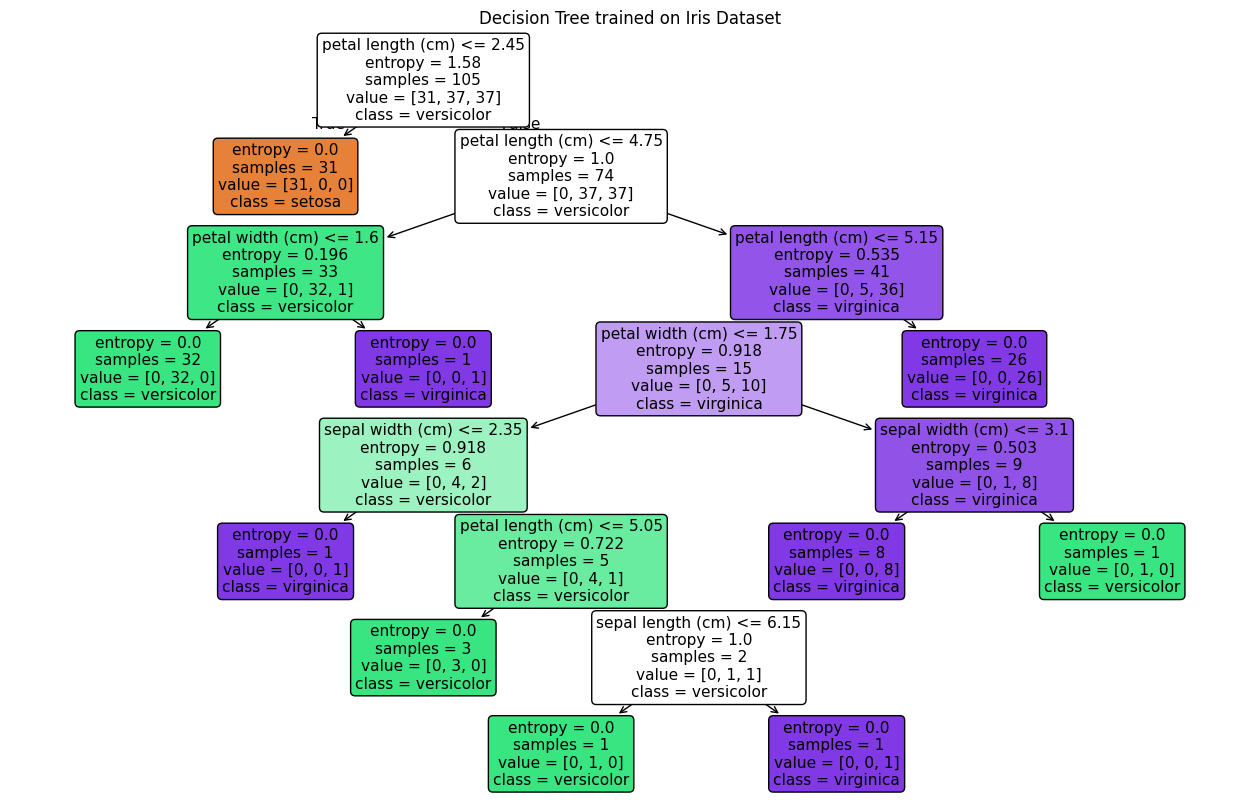

In [10]:
# Importing required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

# 1.Loading the Iris dataset
iris = load_iris()
X = iris.data              # Features
y = iris.target            # Labels
feature_names = iris.feature_names #Storing names of features and target
class_names = iris.target_names

##

#2.Split the dataset into training(70%) and testing(30%) data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

##

# 3.Train the Decision Tree classifier
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)

##

#4.Plot the learned decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.title("Decision Tree trained on Iris Dataset")
plt.show()

#Printing sample results
y_pred = dt_model.predict(X_test)

y_test_names = [class_names[i] for i in y_test]
y_pred_names = [class_names[i] for i in y_pred]

X_test_df = pd.DataFrame(X_test, columns=feature_names)




# Question 4

## Support Vector Machines (SVM)
### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



##Answers

a) A Support Vector Machine (SVM) is a supervised learning algorithm.Because it learns from a labeled dataset. It uses both inputs and output labels during training.

b)Margin: The distance between the boundary and the closest
points (Support Vectors).  
SVM aim to maximize the margin to lower the error on new data and get best predicted output.   
Because a larger margin reduces the model’s sensitivity to small variations or noise in the training data. This helps the model perform better on unseen data.

c)Support vectors are the data points that are closest to the decision boundary (hyperplane) in SVM.

They are important in defining Decision Boundary because :   
They determine the maximium margin  
Boundary depends only on support vectors. If we change those then hyperplane is also changed.

d)Purpose of kernel function :   
Some datasets cannot be separated by a straight line in the original space.  
A kernel transforms the data in 3 dimensions so that a linear hyperplane can separate the classes in the new space.

Two commonly used kernel functions :   
1)Linear kernel   
2)Polynomial kernel

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

##Answers


a)In a linearly separable data, SVM chooses optimal separating hyperplane by maximizing margin between two classes  
There can be many hyperplanes that correctly separate classes  
SVM selects the one that maximizes the distance between the hyperplane and support vectors  
This makes model less sensitive to noise.

b)When the data is not linearly separable, a straight hyperplane cannot perfectly separate the classes.  

SVM handles this situation by:  
Kernel Trick
Uses a kernel function to map data into a higher dimensional space.  
In this new space, the data becomes linearly separable, allowing SVM to find a separating hyperplane.

c)The parameter C controls the balance between maximizing the margin and minimizing classification error on the training data.

When C is very small:  
The model allows more misclassifications.  
SVM focuses more on maximizing the margin.  
Margin becomes wider.  
Risk of underfitting.

When C is very large:  
The model strongly penalizes misclassification.  
SVM tries to classify all training points correctly.  
Margin becomes smaller.  
Risk of overfitting
